In [1]:
import glob
from google.colab import drive
drive.mount('/content/drive')

accepted_words = glob.glob("/content/drive/MyDrive/accepted_words.csv")

answer_lst = glob.glob("/content/drive/MyDrive/answers.csv")

!pip install wordfreq

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
possible_strings = ['ggggg', 'ggggy', 'ggggz', 'gggyg', 'gggyy', 'gggyz', 'gggzg', 'gggzy', 'gggzz', 'ggygg', 'ggygy', 'ggygz', 'ggyyg', 'ggyyy', 'ggyyz', 'ggyzg', 'ggyzy', 'ggyzz', 'ggzgg', 'ggzgy', 'ggzgz', 'ggzyg', 'ggzyy', 'ggzyz', 'ggzzg', 'ggzzy', 'ggzzz', 'gyggg', 'gyggy', 'gyggz', 'gygyg', 'gygyy', 'gygyz', 'gygzg', 'gygzy', 'gygzz', 'gyygg', 'gyygy', 'gyygz', 'gyyyg', 'gyyyy', 'gyyyz', 'gyyzg', 'gyyzy', 'gyyzz', 'gyzgg', 'gyzgy', 'gyzgz', 'gyzyg', 'gyzyy', 'gyzyz', 'gyzzg', 'gyzzy', 'gyzzz', 'gzggg', 'gzggy', 'gzggz', 'gzgyg', 'gzgyy', 'gzgyz', 'gzgzg', 'gzgzy', 'gzgzz', 'gzygg', 'gzygy', 'gzygz', 'gzyyg', 'gzyyy', 'gzyyz', 'gzyzg', 'gzyzy', 'gzyzz', 'gzzgg', 'gzzgy', 'gzzgz', 'gzzyg', 'gzzyy', 'gzzyz', 'gzzzg', 'gzzzy', 'gzzzz', 'ygggg', 'ygggy', 'ygggz', 'yggyg', 'yggyy', 'yggyz', 'yggzg', 'yggzy', 'yggzz', 'ygygg', 'ygygy', 'ygygz', 'ygyyg', 'ygyyy', 'ygyyz', 'ygyzg', 'ygyzy', 'ygyzz', 'ygzgg', 'ygzgy', 'ygzgz', 'ygzyg', 'ygzyy', 'ygzyz', 'ygzzg', 'ygzzy', 'ygzzz', 'yyggg', 'yyggy', 'yyggz', 'yygyg', 'yygyy', 'yygyz', 'yygzg', 'yygzy', 'yygzz', 'yyygg', 'yyygy', 'yyygz', 'yyyyg', 'yyyyy', 'yyyyz', 'yyyzg', 'yyyzy', 'yyyzz', 'yyzgg', 'yyzgy', 'yyzgz', 'yyzyg', 'yyzyy', 'yyzyz', 'yyzzg', 'yyzzy', 'yyzzz', 'yzggg', 'yzggy', 'yzggz', 'yzgyg', 'yzgyy', 'yzgyz', 'yzgzg', 'yzgzy', 'yzgzz', 'yzygg', 'yzygy', 'yzygz', 'yzyyg', 'yzyyy', 'yzyyz', 'yzyzg', 'yzyzy', 'yzyzz', 'yzzgg', 'yzzgy', 'yzzgz', 'yzzyg', 'yzzyy', 'yzzyz', 'yzzzg', 'yzzzy', 'yzzzz', 'zgggg', 'zgggy', 'zgggz', 'zggyg', 'zggyy', 'zggyz', 'zggzg', 'zggzy', 'zggzz', 'zgygg', 'zgygy', 'zgygz', 'zgyyg', 'zgyyy', 'zgyyz', 'zgyzg', 'zgyzy', 'zgyzz', 'zgzgg', 'zgzgy', 'zgzgz', 'zgzyg', 'zgzyy', 'zgzyz', 'zgzzg', 'zgzzy', 'zgzzz', 'zyggg', 'zyggy', 'zyggz', 'zygyg', 'zygyy', 'zygyz', 'zygzg', 'zygzy', 'zygzz', 'zyygg', 'zyygy', 'zyygz', 'zyyyg', 'zyyyy', 'zyyyz', 'zyyzg', 'zyyzy', 'zyyzz', 'zyzgg', 'zyzgy', 'zyzgz', 'zyzyg', 'zyzyy', 'zyzyz', 'zyzzg', 'zyzzy', 'zyzzz', 'zzggg', 'zzggy', 'zzggz', 'zzgyg', 'zzgyy', 'zzgyz', 'zzgzg', 'zzgzy', 'zzgzz', 'zzygg', 'zzygy', 'zzygz', 'zzyyg', 'zzyyy', 'zzyyz', 'zzyzg', 'zzyzy', 'zzyzz', 'zzzgg', 'zzzgy', 'zzzgz', 'zzzyg', 'zzzyy', 'zzzyz', 'zzzzg', 'zzzzy', 'zzzzz']

In [3]:
import random
import csv
import copy
import matplotlib.pyplot as plt
import numpy as np
from wordfreq import word_frequency

with open(accepted_words[0], newline='') as f:
    reader = csv.reader(f)
    accepted = list(reader)

with open(answer_lst[0], newline='') as f:
    reader = csv.reader(f)
    answers = list(reader)

data = accepted + answers

class Wordle():
    def __init__(self):
        self.word_lst = [x for sub in data for x in sub]
        self.unchanging_lst = self.word_lst.copy()
        self.word = random.choice(answers[0])
        # A dictionary which holds the frequency of each letter
        # in the answer. This will be of use when words have more
        # than one letter and we have to narrow down our guesses.
        self.multiple_letters = {}
        for letter in self.word:
            if letter in self.multiple_letters:
                self.multiple_letters[letter] += 1
            else:
                self.multiple_letters[letter] = 1
        # A dictionary that will record the currently known frequency
        # of each letter appearing in the answer. This will be updated 
        # each time we make a guess.
        self.known_letter_frequency = {}
        # A list that contains all the green letters we have got so far.
        self.perfect = ["","","","",""]
        # A dictionary that contains all the yellow letters.
        self.inside = {}
        # A dictionary containing all the grey letters.
        self.outside = {}
        # This dictionary will record how many letters appear in the remaining
        # guess list. For example, it will contain key:value pairs  
        # like 'a':192', 'e':127 etc.
        self.remaining_letters = {}
        self.win = False
        self.guesses = 0
        self.gain_more_info = True

    def guess(self, guess):
        self.guesses += 1
        letters_used = {}
        for idx, letter in enumerate(guess):
            # If the letter is in the word...
            if letter in self.multiple_letters:
                if letter in letters_used:
                    letters_used[letter] += 1
                else:
                    letters_used[letter] = 1
                # If our guess contains a letter more times than it appears in 
                # the actual answer word, than we shall simply pass without updating
                # our known_letter_frequency dictionary.     
                if letters_used[letter] > self.multiple_letters[letter]:
                    pass
                else:
                    # Updating the known_letter_frequency dictionary as the frequency of the letter in our guess
                    # so far is at least less than or equal to the number of times it actually appears in the answer
                    if letter in self.known_letter_frequency:
                        self.known_letter_frequency[letter] = max(self.known_letter_frequency[letter], letters_used[letter])
                    else:
                        self.known_letter_frequency[letter] = 1

            # Deals with green letters
            if guess[idx] == self.word[idx]:
                self.perfect[idx] = letter
            # Deals with yellow letters
            elif letter in self.word:
                if letter not in self.inside:
                    self.inside[letter] = [idx]
                else:
                    if idx not in self.inside[letter]:
                        self.inside[letter] = self.inside[letter] + [idx]
            # Deals with grey letters
            else:
                self.outside[letter] = True
        
        if "" not in self.perfect:
            self.win = True

    def narrow_words(self):
        # As we iterate through our possible answers list, we shall be
        # removing words if they don't match certain criteria. As such,
        # this pop_counter variable will help us avoid index errors
        # as we iterate through a list we are updating. 
        pop_counter = 0
        for i in range(len(self.word_lst)):
            # Bool variable that keeps track of whether we should
            # continue with the current iteration
            still_good = True
            # Dictionary that records the frequency of each letter
            guess_frequency = {}
            for letter in self.word_lst[i - pop_counter]:
                if letter in guess_frequency:
                    guess_frequency[letter] += 1
                else:
                    guess_frequency[letter] = 1

            # Checks if the currently known frequency of letters in the answer
            # matches the current guess's frequency of letters.
            for key, value in self.known_letter_frequency.items():
                # Letters we know are in the answer aren't in the current word at all,
                # so we shall pop it from the words list.
                if key not in guess_frequency:
                    self.word_lst.pop(i - pop_counter)
                    pop_counter += 1
                    still_good = False
                    break
                else:
                    # If this guess word uses a letter fewer times than we know it
                    # appears in the answer, then we shall also pop it
                    if guess_frequency[key] < value:
                        self.word_lst.pop(i - pop_counter)
                        pop_counter += 1
                        still_good = False
                        break
                    # If the sum of the values in the known_letter_frequency dictionary is 5
                    # (meaning we know how many times every letter appears), and if the current
                    # guess uses a letter more times than it appears in the known_letter_frequency
                    # dictionary, it must also be popped
                    if sum(self.known_letter_frequency.values()) == 5:
                        if guess_frequency[key] > value:
                            self.word_lst.pop(i - pop_counter)
                            pop_counter += 1
                            still_good = False
                            break
            if still_good == False:
                continue
            # Checks if it contains letters we know are not in the word
            for letter in self.word_lst[i - pop_counter]:
                if letter in self.outside and letter not in self.inside and letter not in self.perfect:
                    self.word_lst.pop(i - pop_counter)
                    pop_counter += 1
                    still_good = False
                    break
            if still_good == False:
                continue
            # Checks whether letters in the word are in places we know
            # they should not be in. 
            for letter in self.inside.keys():
                if still_good == False:
                    break
                for place in self.inside[letter]:
                    if letter == self.word_lst[i - pop_counter][place]:
                        self.word_lst.pop(i - pop_counter)
                        pop_counter += 1
                        still_good = False
                        break
            if still_good == False:
                continue
            # Checks if the word contains letters
            # in the right positions
            for idx, letter in enumerate(self.perfect):
                if letter != "":
                    if self.word_lst[i - pop_counter][idx] != self.perfect[idx]:
                        self.word_lst.pop(i - pop_counter)
                        pop_counter += 1
                        still_good = False
                        break

        return self.word_lst

    def letters_in_last_words(self):
        self.remaining_letters = {}
        for word in self.word_lst:
            for letter in word:
                if letter in self.remaining_letters:
                    self.remaining_letters[letter] += 1
                else:
                    self.remaining_letters[letter] = 1

    def machine_placement_guess(self):

        letter_position_count = {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}

        for word in self.word_lst:
            for idx, letter in enumerate(word):
                if letter in letter_position_count[idx]:
                    letter_position_count[idx][letter] += 1
                else:
                    letter_position_count[idx][letter] = 1

        best_count = 0
        best_word = ""

        for word in self.unchanging_lst:
            count = 0
            seen = {}
            consider = True
            for idx, letter in enumerate(word):
                if letter in self.inside or letter in self.outside or letter in self.perfect:
                    consider = False
                    break
                if self.gain_more_info == True:
                    if letter not in self.remaining_letters:
                        consider = False
                        break
                    if letter in seen:
                        consider = False
                        break
                if letter in letter_position_count[idx]:
                    count += letter_position_count[idx][letter]
                if letter not in seen:
                    if letter in self.remaining_letters:
                        count += self.remaining_letters[letter]
                        seen[letter] = True
            if consider == True:
                if count > best_count:
                    best_count = count
                    best_word = word

        if best_word != "":
            return best_word
        else:
            if self.gain_more_info == True:
                self.gain_more_info = False
                return self.machine_placement_guess()
            return False

    def machine_next_guess(self):
        letter_position_count = {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}
        for word in self.word_lst:
            for idx, letter in enumerate(word):
                if letter in letter_position_count[idx]:
                    letter_position_count[idx][letter] += 1
                else:
                    letter_position_count[idx][letter] = 1

        word_count = {}
        for word in self.word_lst:
            count = 0
            seen = {}
            for letter in word:
                if letter in letter_position_count[idx]:
                    count += letter_position_count[idx][letter]
                if letter in seen:
                    continue
                seen[letter] = True
                if letter in self.remaining_letters:
                    count += self.remaining_letters[letter]
            word_count[word] = count 
        new_lst = sorted(word_count.values())
        return list(word_count.keys())[list(word_count.values()).index(new_lst[len(new_lst) // 2])]

    def look_ahead_guess(self):
        highest_score = 0
        average_score = 0
        best_word = ""
        for word in self.word_lst:
            score = 0
            for string in possible_strings:
                copied_obj = copy.deepcopy(self)
                skip_iteration = False
                for i in range(len(string)):
                    if string[i] == "g":
                        if copied_obj.perfect[i] != "":
                            if copied_obj.perfect[i] == word[i]:
                                pass
                            else:
                                skip_iteration = True
                                break
                        else:
                            copied_obj.perfect[i] = word[i]
                    elif string[i] == "y":
                        if word[i] not in copied_obj.inside:
                            if word[i] in copied_obj.outside or word[i] == copied_obj.perfect[i]:
                                skip_iteration = True
                                break
                            copied_obj.inside[word[i]] = [i]
                        else:
                            if i not in copied_obj.inside[word[i]]:
                                if word[i] in copied_obj.outside or word[i] == copied_obj.perfect[i]:
                                    skip_iteration = True
                                    break
                                copied_obj.inside[word[i]] = copied_obj.inside[word[i]] + [i]
                    elif string[i] == "z":
                        if word[i] in copied_obj.inside or word[i] in copied_obj.perfect:
                            skip_iteration = True
                            break
                        copied_obj.outside[word[i]] = True
                if skip_iteration == False:
                    copied_obj.narrow_words()
                    new_length = len(copied_obj.word_lst)
                    if new_length != 0:
                        possibility = new_length / len(self.word_lst)
                        difference = len(self.word_lst) - new_length
                        score += (possibility * difference)
    
            average_score = score / len(possible_strings)
            if average_score >= highest_score:
                highest_score = average_score
                best_word = word

        return best_word
    
    def eliminate_similar_words(self):
        dic = {0: {}, 1: {}, 2: {}, 3:{}, 4:{}}
        for string in self.word_lst:
            for j, letter in enumerate(string):
                if letter in dic[j]:
                    dic[j][letter] += 1
                else:
                    dic[j][letter] = 1

        count_same_letters = 0
        for key in dic.keys():
            if max(dic[key].values()) > len(self.word_lst) // 2:
                count_same_letters += 1
            else:
                special_key = key

        if count_same_letters == 4:
            best_count = 0
            best_word = ""
            for word in self.unchanging_lst:
                count_same_letters = 0
                already_seen = {}
                for letter in word:
                    if letter in already_seen:
                        continue
                    if letter in dic[special_key]:
                        already_seen[letter] = True
                        count_same_letters += 1

                if count_same_letters > best_count:
                    best_count = count_same_letters
                    best_word = word
            return best_word
        return False

    def word_frequency_guess(self):
        best_count = 0
        best_word = ""
        for word in self.word_lst:
            score = word_frequency(word, "en")
            if score > best_count:
                best_count = score
                best_word = word
        return best_word

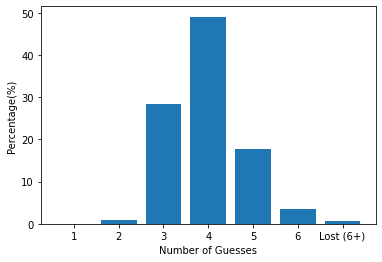

In [4]:
win_count = 0
total_games = 0

guess_lst = ["1", "2", "3", "4", "5", "6", "Lost (6+)"]
num_per_guess = [0, 0, 0, 0, 0, 0, 0]

for i in range(10000):
    total_games += 1
    obj = Wordle()
    #print("\nGame Number " + str(total_games) + "\n")
    while obj.guesses < 6 and obj.win == False:
        # At the start, the algorithm always chooses "tares". To save time,
        # this guess will immediately be inputted.
        if obj.guesses == 0:
            algorithm_guess = "tares"
        elif obj.guesses == 5 or len(obj.word_lst) <= 5:
            algorithm_guess = obj.word_frequency_guess()
        else:
            obj.letters_in_last_words()
            if len(obj.word_lst) <= 13:
                a = obj.eliminate_similar_words()
                if a != False and obj.guesses < 5:
                    algorithm_guess = a
                else:
                    algorithm_guess = obj.machine_next_guess()
            else:
                algorithm_guess = obj.machine_placement_guess()
                if algorithm_guess == False:
                    algorithm_guess = obj.machine_next_guess()
        obj.guess(algorithm_guess)
        obj.narrow_words()
        #print("The machine guessed: " + str(algorithm_guess))
        #print("Perfect: " + str(obj.perfect))
        #print("Contains: " + str(obj.inside))
        #print("Excludes: " + str(obj.outside))


    if obj.win == True:
        win_count += 1
        num_per_guess[obj.guesses - 1] += 1
        #print("The machine guessed correctly!")
    else:
        num_per_guess[6] += 1
        #print("The machine guessed incorrectly. The word was " + str(obj.word) + ".")
for i in range(len(num_per_guess)):
  num_per_guess[i] = (num_per_guess[i] / 10000) * 100

xpos = np.arange(len(guess_lst))
plt.bar(xpos,num_per_guess, label="Percentage Guessed")
plt.xticks(xpos,guess_lst)
plt.xlabel("Number of Guesses")
plt.ylabel("Percentage(%)")
plt.show()

In [5]:
print("Total games: " + str(total_games))     
print("Win count: " + str(win_count))
print("Percentage won: " + str((win_count / total_games) * 100))
print("\n")
for i in range(len(num_per_guess)):
  if i == 6:
    print("Percentage of games lost: " + str(round(num_per_guess[i], 2)))
  else:
    print("Percentage guessed at guess #{guess}: ".format(guess=i + 1) + str(round(num_per_guess[i], 2)))

Total games: 10000
Win count: 9941
Percentage won: 99.41


Percentage guessed at guess #1: 0.0
Percentage guessed at guess #2: 0.87
Percentage guessed at guess #3: 28.35
Percentage guessed at guess #4: 49.08
Percentage guessed at guess #5: 17.71
Percentage guessed at guess #6: 3.4
Percentage of games lost: 0.59
